In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from bigfile import BigFile
import seaborn as sns
sns.set()
sns.set_palette("Set2")
sns.set_style('ticks',{'ytick.direction':'in','xtick.direction':'in'})

cmap = plt.get_cmap("Set2")
sns.set_context("paper", font_scale=1.7,rc={"axes.linewidth": 1.3,"lines.linewidth": 2.5,"patch.linewidth": 2.2})
from matplotlib import rcParams as rc
import matplotlib as mpl
import glob

In [2]:
mroot = "/home1/08942/nianyic/work/Astrid/mergers/mdata/"

flist = sorted(glob.glob(mroot + "bh-merger-*.npy"))

ff = flist[0]
int(ff.split('.')[0].split('R')[-1])

5

In [3]:
merger = np.load(ff)
merger.dtype

dtype([('z', '<f8'), ('ID1', '<i8'), ('ID2', '<i8'), ('m1', '<f8'), ('m2', '<f8')])

In [4]:
a = np.array([1,2,3,4,5])
b = 6
(a==b).nonzero()[0]

array([], dtype=int64)

### check data

In [5]:
fnum = 234
snap = 225

file = "/home1/08942/nianyic/scratch3/Astrid/merger_catalog/before/before-merger-gal-R%03d-S%03d.npy"%(fnum, snap)

merger = np.load(file)

In [6]:
merger.dtype

dtype([('zmerge', '<f8'), ('id1', '<i8'), ('id2', '<i8'), ('m1', '<f8'), ('m2', '<f8'), ('m4tot1', '<f8'), ('m4tot2', '<f8'), ('sigma1', '<f8'), ('sigma2', '<f8'), ('mseed1', '<f8'), ('mseed2', '<f8'), ('zseed1', '<f8'), ('zseedo2', '<f8'), ('zsnap', '<f8'), ('snap_num', '<i4')])

In [7]:
set(merger['zsnap'])

{2.905641487870433}

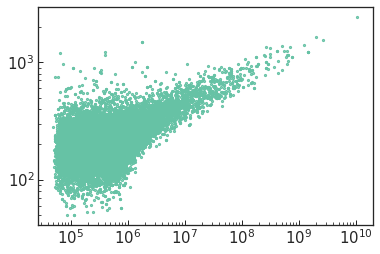

In [16]:
plt.scatter(merger['m1'], merger['sigma1'], s=1)
plt.xscale('log')
plt.yscale('log')



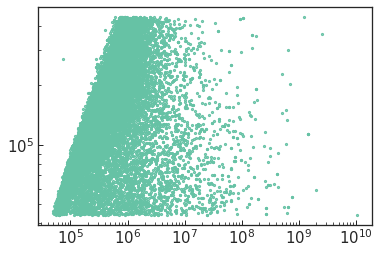

In [12]:
plt.scatter(merger['m1'], merger['mseed1'], s=1)
plt.xscale('log')
plt.yscale('log')



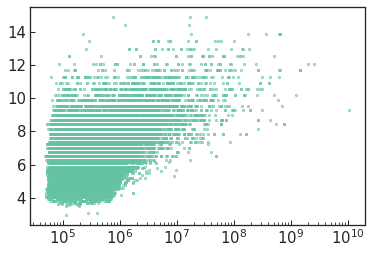

In [15]:
plt.scatter(merger['m1'], merger['zseed1'], s=0.5)
plt.xscale('log')



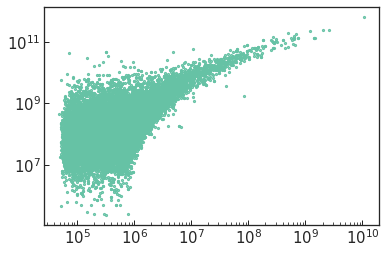

In [17]:
plt.scatter(merger['m1'], merger['m4tot1'], s=1)
plt.xscale('log')
plt.yscale('log')



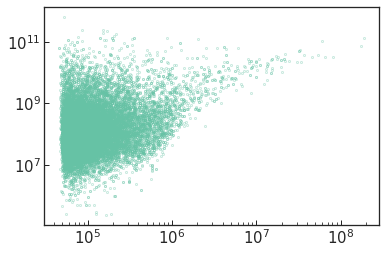

In [22]:
plt.scatter(merger['m2'], merger['m4tot1'], s=0.1)
plt.xscale('log')
plt.yscale('log')



### assemble data- tests

In [69]:
fnum = 234
snap = 225


before_root = "/home1/08942/nianyic/scratch3/Astrid/merger_catalog/before/"
after_root  = "/home1/08942/nianyic/scratch3/Astrid/merger_catalog/after/"


before_file =  "before-merger-gal-R*-S*.npy"
after_file  = "after-merger-gal-R*-S*.npy"

mergers = []
for ff in sorted(glob.glob(after_root + after_file)):
    # print(ff)
    mergers.append(np.load(ff))
    
    
mergers = np.concatenate(mergers)

In [70]:
print(mergers.dtype)
print(len(mergers))

[('zmerge', '<f8'), ('id1', '<i8'), ('id2', '<i8'), ('m1', '<f8'), ('m2', '<f8'), ('m4tot', '<f8'), ('mhtot', '<f8'), ('sigma', '<f8'), ('rho', '<f8'), ('gamma', '<f8'), ('zsnap', '<f8'), ('snap_num', '<i4')]
633913


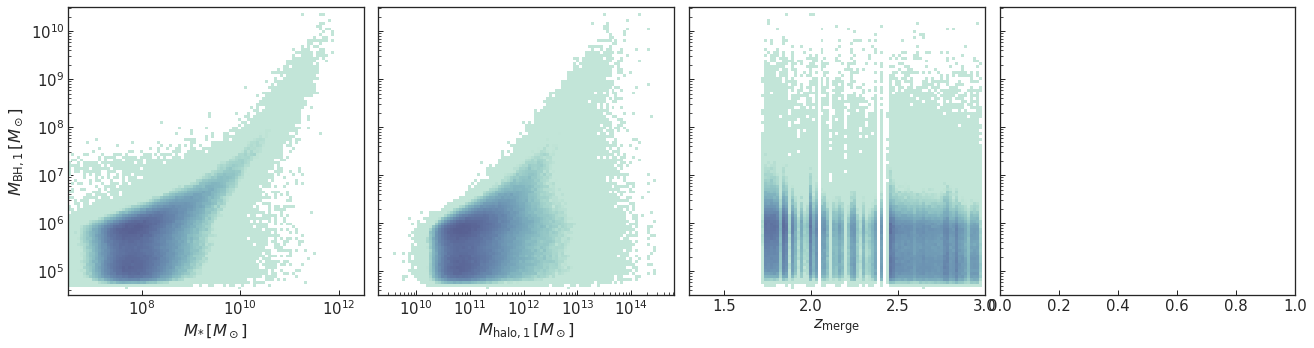

In [82]:
cc3 = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)



fig, ax = plt.subplots(1,4,figsize=(22,5.3), sharey=True)
plt.subplots_adjust(wspace=0.05)
ax = ax.flatten()


ymin, ymax = 4.5, 10.5
xmin, xmax = 6.5, 12.5

xbins = np.logspace(xmin,xmax, 100)
ybins = np.logspace(ymin,ymax, 100)
ax[0].hist2d(mergers['m4tot'], mergers['m1'], bins = [xbins, ybins], cmap=cc3,  cmin=1, norm=mpl.colors.LogNorm(vmin=50, vmax=8000))
ax[0].set(xscale='log', yscale='log', xlabel=r'$M_{*}\,[M_\odot]$', ylabel=r'$M_{\rm BH, 1}\,[M_\odot]$')


ymin, ymax = 4.5, 10.5
xmin, xmax = 9.3, 14.8

xbins = np.logspace(xmin,xmax, 100)
ybins = np.logspace(ymin,ymax, 100)

ax[1].hist2d(mergers['mhtot'], mergers['m1'], bins = [xbins, ybins], cmap=cc3,  cmin=1, norm=mpl.colors.LogNorm(vmin=50, vmax=8000))
ax[1].set(xscale='log', yscale='log', xlabel=r'$M_{\rm halo, 1}\,[M_\odot]$')


ymin, ymax = 4.5, 10.5
xmin, xmax = 1.3, 3

xbins = np.linspace(xmin,xmax, 100)
ybins = np.logspace(ymin,ymax, 100)

ax[2].hist2d(mergers['zmerge'], mergers['m1'], bins = [xbins, ybins], cmap=cc3,  cmin=1, norm=mpl.colors.LogNorm(vmin=50, vmax=8000))
ax[2].set(yscale='log', xlabel=r'$z_{\rm merge}$')





# ymin, ymax = 4.5, 10.5
# xmin, xmax = 1.3, 10

# xbins = np.linspace(xmin,xmax, 100)
# ybins = np.logspace(ymin,ymax, 100)

# ax[3].hist2d(mergers['zseed1'], mergers['m1'], bins = [xbins, ybins], cmap=cc3,  cmin=1, norm=mpl.colors.LogNorm(vmin=50, vmax=8000))
# ax[3].set(xscale='log', yscale='log', xlabel=r'$M_{\rm seed, 1}\,[M_\odot]$')



plt.show()

In [85]:



before_root = "/home1/08942/nianyic/scratch3/Astrid/merger_catalog/before/"
after_root  = "/home1/08942/nianyic/scratch3/Astrid/merger_catalog/after/"


before_file =  "before-merger-gal-R*-S*.npy"
after_file  = "after-merger-gal-R*-S*.npy"

mergers_b = []
for ff in sorted(glob.glob(before_root + before_file)):
    # print(ff)
    mergers_b.append(np.load(ff))
    
    
mergers_b = np.concatenate(mergers_b)
mergers_b.dtype

dtype([('zmerge', '<f8'), ('id1', '<i8'), ('id2', '<i8'), ('m1', '<f8'), ('m2', '<f8'), ('m4tot1', '<f8'), ('m4tot2', '<f8'), ('sigma1', '<f8'), ('sigma2', '<f8'), ('mseed1', '<f8'), ('mseed2', '<f8'), ('zseed1', '<f8'), ('zseedo2', '<f8'), ('zsnap', '<f8'), ('snap_num', '<i4')])

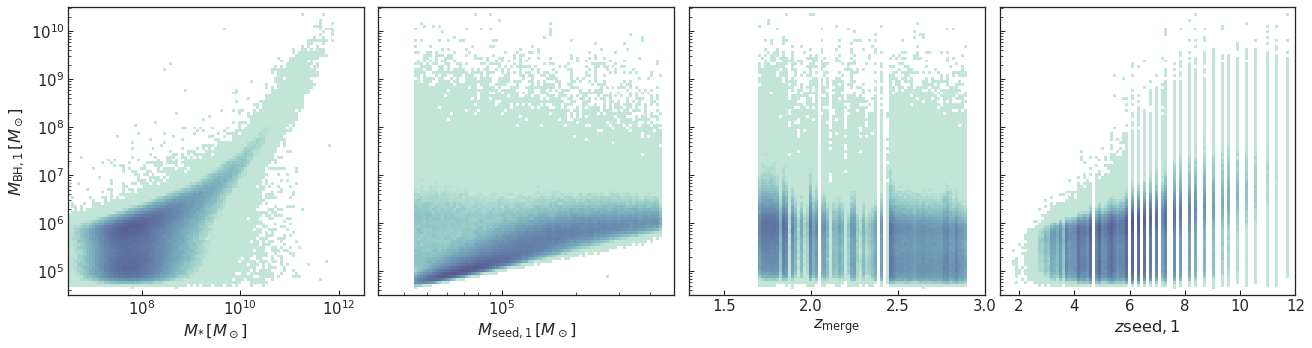

In [91]:
cc3 = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)



fig, ax = plt.subplots(1,4,figsize=(22,5.3), sharey=True)
plt.subplots_adjust(wspace=0.05)
ax = ax.flatten()


ymin, ymax = 4.5, 10.5
xmin, xmax = 6.5, 12.5

xbins = np.logspace(xmin,xmax, 100)
ybins = np.logspace(ymin,ymax, 100)
ax[0].hist2d(mergers_b['m4tot1'], mergers_b['m1'], bins = [xbins, ybins], cmap=cc3,  cmin=1, norm=mpl.colors.LogNorm(vmin=50, vmax=8000))
ax[0].set(xscale='log', yscale='log', xlabel=r'$M_{*}\,[M_\odot]$', ylabel=r'$M_{\rm BH, 1}\,[M_\odot]$')


ymin, ymax = 4.5, 10.5
xmin, xmax = 4.5, 5.7

xbins = np.logspace(xmin,xmax, 100)
ybins = np.logspace(ymin,ymax, 100)

ax[1].hist2d(mergers_b['mseed1'], mergers_b['m1'], bins = [xbins, ybins], cmap=cc3,  cmin=1, norm=mpl.colors.LogNorm(vmin=50, vmax=8000))
ax[1].set(xscale='log', yscale='log', xlabel=r'$M_{\rm seed, 1}\,[M_\odot]$')


ymin, ymax = 4.5, 10.5
xmin, xmax = 1.3, 3

xbins = np.linspace(xmin,xmax, 100)
ybins = np.logspace(ymin,ymax, 100)

ax[2].hist2d(mergers_b['zmerge'], mergers_b['m1'], bins = [xbins, ybins], cmap=cc3,  cmin=1, norm=mpl.colors.LogNorm(vmin=50, vmax=8000))
ax[2].set(yscale='log', xlabel=r'$z_{\rm merge}$')





ymin, ymax = 4.5, 10.5
xmin, xmax = 1.3, 12

xbins = np.linspace(xmin,xmax, 100)
ybins = np.logspace(ymin,ymax, 100)

ax[3].hist2d(mergers_b['zseed1'], mergers_b['m1'], bins = [xbins, ybins], cmap=cc3,  cmin=1, norm=mpl.colors.LogNorm(vmin=50, vmax=8000))
ax[3].set(yscale='log', xlabel=r'$z{\rm seed, 1}$')



plt.show()

In [ ]:
cc3 = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)



fig, ax = plt.subplots(1,4,figsize=(22,5.3), sharey=True)
plt.subplots_adjust(wspace=0.05)
ax = ax.flatten()


ymin, ymax = 4.5, 10.5
xmin, xmax = 6.5, 12.5

xbins = np.logspace(xmin,xmax, 100)
ybins = np.logspace(ymin,ymax, 100)
ax[0].hist2d(mergers_b['m4tot1'], mergers_b['m2'], bins = [xbins, ybins], cmap=cc3,  cmin=1, norm=mpl.colors.LogNorm(vmin=50, vmax=8000))
ax[0].set(xscale='log', yscale='log', xlabel=r'$M_{*}\,[M_\odot]$', ylabel=r'$M_{\rm BH, 1}\,[M_\odot]$')


ymin, ymax = 4.5, 10.5
xmin, xmax = 4.5, 5.7

xbins = np.logspace(xmin,xmax, 100)
ybins = np.logspace(ymin,ymax, 100)

ax[1].hist2d(mergers_b['mseed1'], mergers_b['m2'], bins = [xbins, ybins], cmap=cc3,  cmin=1, norm=mpl.colors.LogNorm(vmin=50, vmax=8000))
ax[1].set(xscale='log', yscale='log', xlabel=r'$M_{\rm seed, 1}\,[M_\odot]$')


ymin, ymax = 4.5, 10.5
xmin, xmax = 1.3, 3

xbins = np.linspace(xmin,xmax, 100)
ybins = np.logspace(ymin,ymax, 100)

ax[2].hist2d(mergers_b['zmerge'], mergers_b['m1'], bins = [xbins, ybins], cmap=cc3,  cmin=1, norm=mpl.colors.LogNorm(vmin=50, vmax=8000))
ax[2].set(yscale='log', xlabel=r'$z_{\rm merge}$')





ymin, ymax = 4.5, 10.5
xmin, xmax = 1.3, 12

xbins = np.linspace(xmin,xmax, 100)
ybins = np.logspace(ymin,ymax, 100)

ax[3].hist2d(mergers_b['zseed1'], mergers_b['m1'], bins = [xbins, ybins], cmap=cc3,  cmin=1, norm=mpl.colors.LogNorm(vmin=50, vmax=8000))
ax[3].set(yscale='log', xlabel=r'$z{\rm seed, 1}$')



plt.show()